# Merging, concatenating, and repeating objects
*thebeat* contains a number of functions for manipulating existing objects. These are useful when combining different types of sequences, or when creating complex sound stimuli.

Before we begin, we import the used object classes:

In [27]:
from thebeat.core import Sequence, SoundStimulus, SoundSequence
from thebeat.music import Rhythm

In [28]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Concatenating objects

### ``Sequence``

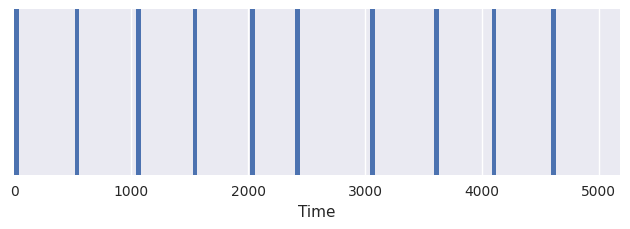

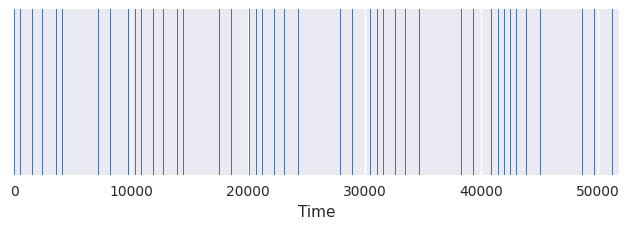

In [29]:
# Initial sequence
seq = Sequence.generate_random_normal(n_events=10, 
                                      mu=500, 
                                      sigma=50, 
                                      end_with_interval=True)
seq.plot_sequence();

# Repeat sequence 10 times and plot
seq_longrepeats = seq * 10
seq_longrepeats.plot_sequence();

---

### ``Rhythm``

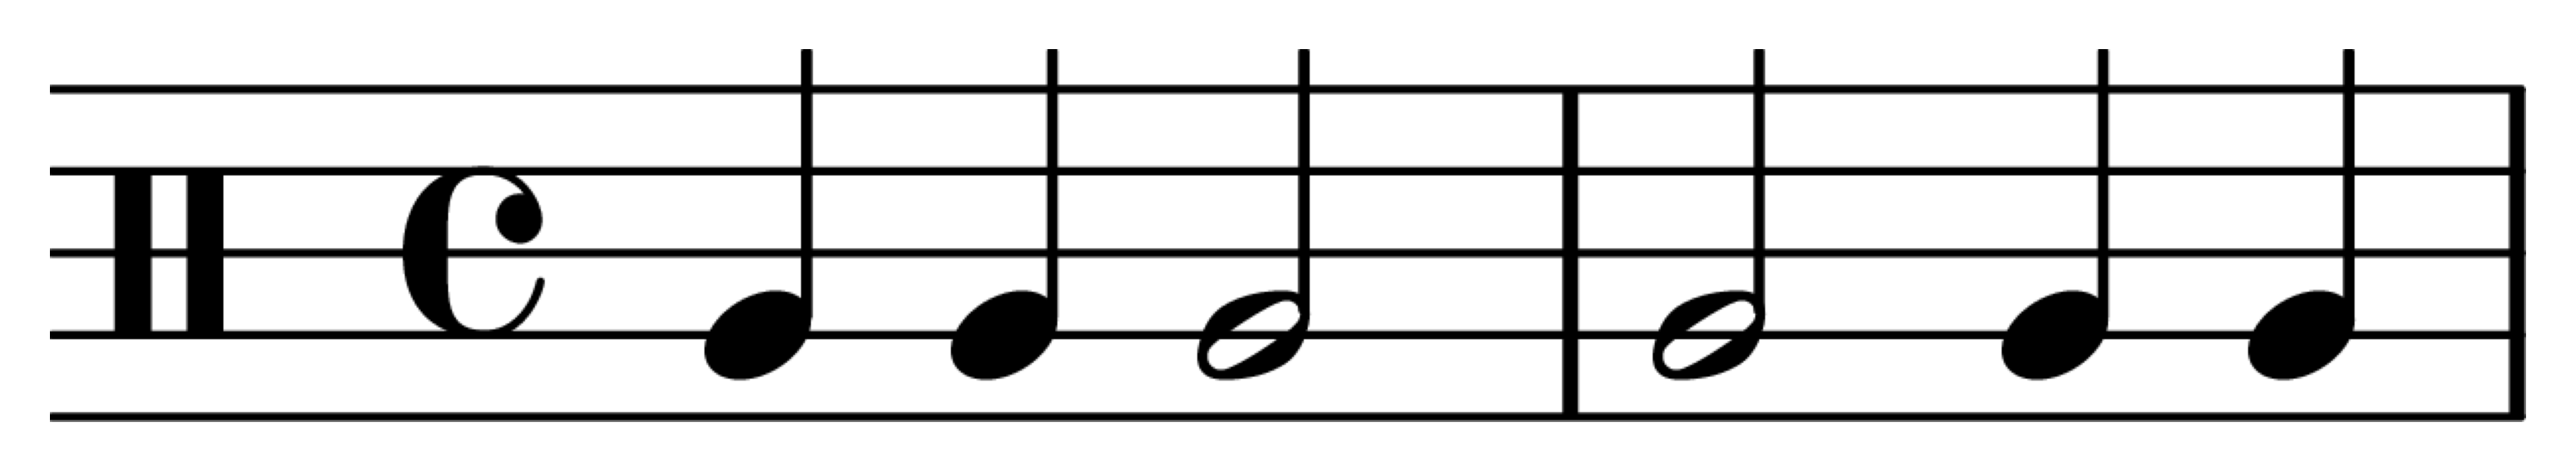

In [30]:
rhythm1 = Rhythm.from_integer_ratios([1, 1, 2])
rhythm2 = Rhythm.from_integer_ratios([2, 1, 1])
rhythm = rhythm1 + rhythm2
rhythm.plot_rhythm(dpi=600, staff_type="percussion");

---

### ``SoundStimulus``

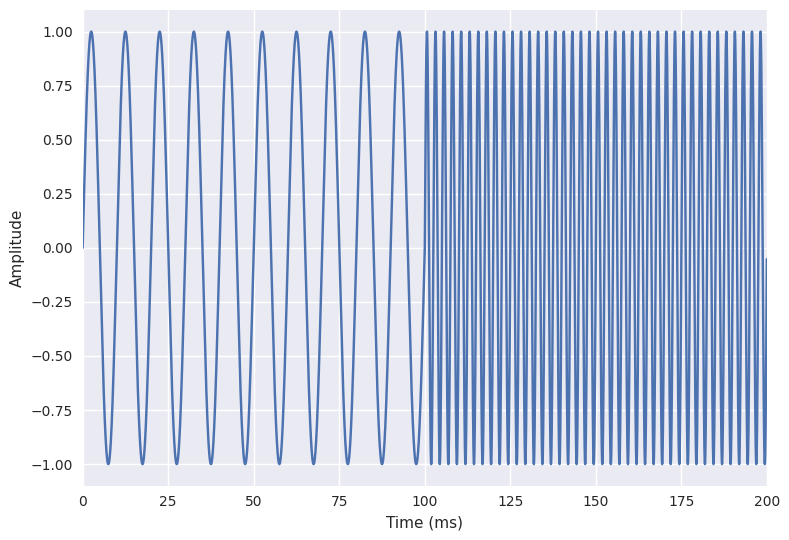

In [31]:
sound1 = SoundStimulus.generate(freq=100, duration_ms=100)
sound2 = SoundStimulus.generate(freq=400, duration_ms=100)
sound = sound1 + sound2
sound.plot_waveform();

### ``SoundSequence``

As a final example, we will combine two SoundSequence objects:

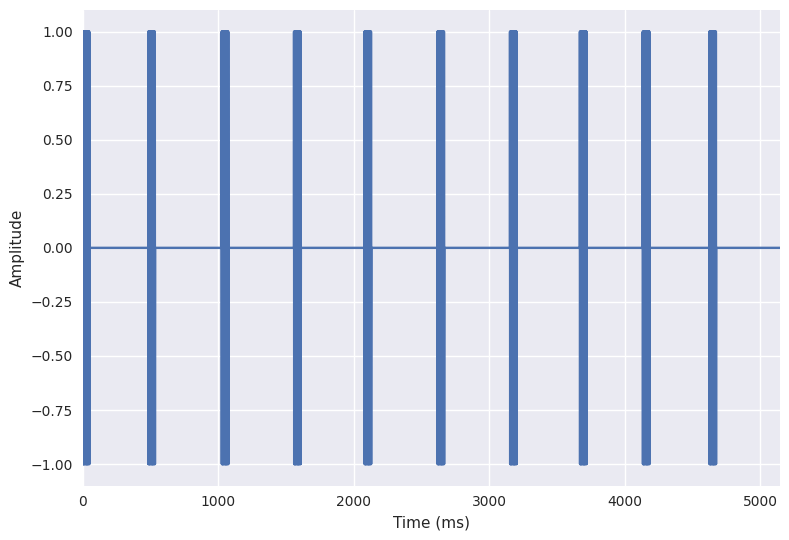

In [32]:
stim = SoundStimulus.generate()

seq1 = Sequence.generate_random_normal(n_events=5, mu=500, sigma=20, end_with_interval=True)
seq2 = Sequence.generate_random_normal(n_events=5, mu=500, sigma=20, end_with_interval=True)

stimseq1 = SoundSequence(stim, seq1)
stimseq2 = SoundSequence(stim, seq2)

trial = stimseq1 + stimseq2
trial.plot_waveform();

## Merging objects

### ``Sequence``

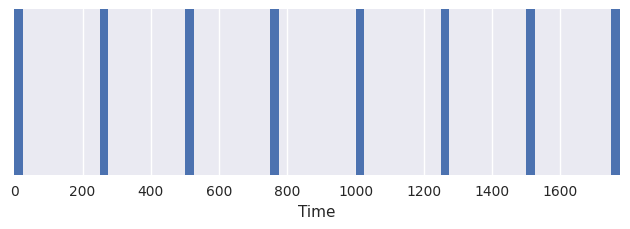

In [33]:
seq1 = Sequence.from_onsets([0, 500, 1000, 1500])
seq2 = Sequence.from_onsets([250, 750, 1250, 1750])

# Method 1
seq = seq1.merge(seq2)

# Method 2
from thebeat.utils import merge_sequences
seq = merge_sequences([seq1, seq2])

# Plot
seq.plot_sequence();

### ``SoundStimulus``: complex sounds

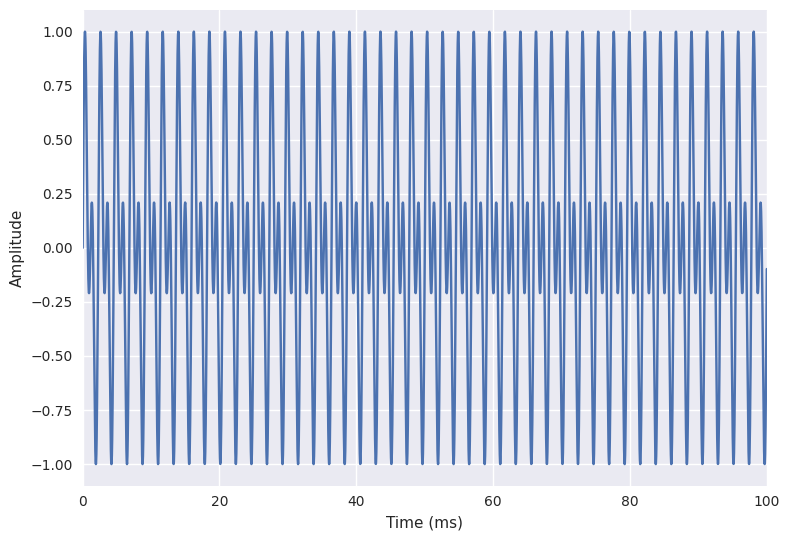

In [34]:
stim_f0 = SoundStimulus.generate(freq=440, duration_ms=100)
stim_f1 = SoundStimulus.generate(freq=880, duration_ms=100)

# Method 1
stim = stim_f0.merge(stim_f1)

# Method 2
from thebeat.utils import merge_soundstimuli
stim = merge_soundstimuli([stim_f0, stim_f1])

# Plot
stim.plot_waveform();

### ``SoundSequence``

In [35]:
ss1 = SoundSequence(stim_f0, seq1)
ss2 = SoundSequence(stim_f1, seq2)

# Method 1
ss = ss1.merge(ss2)

# Method 2
from thebeat.utils import merge_soundsequences
ss = merge_soundsequences([ss1, ss2])

#ss.play()

In [36]:
from IPython.display import Audio
Audio(ss.samples, rate=ss.fs)